In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('after_prepros_youtong.csv', encoding='cp949')
del df['Unnamed: 0']
df = df[2:].reset_index(drop=True)
df = df[df['cor_name']!='현대오토에버']

In [4]:
del df['pre_demand_day']
del df['subs_day']
del df['cor_name']

df['sicho_p']=df['sicho_p'].astype('int64')

In [5]:
x = df[["cor_rate","obligation","market_type","listed_date","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","l_exp_offer_price","h_exp_offer_price", "avail_for_circul"]].values
y = df["sicho_p"].values

In [6]:
!pip install statsmodels


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import statsmodels.api as sm; 
x

array([[1.48078e+03, 6.08000e+00, 0.00000e+00, ..., 1.30000e+04,
        1.50000e+04, 3.79700e+01],
       [1.67090e+03, 3.77000e+01, 0.00000e+00, ..., 2.50000e+04,
        3.00000e+04, 2.78800e+01],
       [1.30370e+02, 1.89400e+01, 1.00000e+00, ..., 3.50000e+04,
        4.31000e+04, 2.78400e+01],
       ...,
       [6.50720e+02, 5.98600e+01, 0.00000e+00, ..., 9.60000e+03,
        1.10000e+04, 3.04400e+01],
       [5.78200e+02, 5.95000e+01, 0.00000e+00, ..., 6.00000e+03,
        6.90000e+03, 2.83000e+01],
       [4.44100e+02, 5.56000e+01, 0.00000e+00, ..., 6.60000e+03,
        7.50000e+03, 2.81900e+01]])

In [8]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.935
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              495.3
Date:                Fri, 12 Aug 2022   Prob (F-statistic):                   1.31e-256
Time:                        23:04:13   Log-Likelihood:                         -5094.1
No. Observations:                 462   AIC:                                  1.021e+04
Df Residuals:                     449   BIC:                                  1.027e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.9151      1.697      2.307      0.022       0.580       7.251
x2           225.6849     52.095      4.332      0.000     123.304     328.066
x3          4326.6669   2491.905      1.736      0.083    -570.579    9223.912
x4            -0.0006      0.000     -4.297      0.000      -0.001      -0.000
x5             1.1006      0.137      8.038      0.000       0.832       1.370
x6           179.5650     23.896      7.515      0.000     132.604     226.526
x7             0.0059      0.001      4.945      0.000       0.004       0.008
x8            -0.0449      0.007     -6.076      0.000      -0.059      -0.030
x9           -66.5348    829.471     -0.080      0.936   -1696.662    1563.592
x10           -0.1755      0.190     -0.924      0.356      -0.549       0.198
x11            0.0389      0.350      0.111      0.912      -0.649       0.727
x12            0.0707      0.333      0.212      0.832      -0.584       0.725
x13           44.8542     55.813      0.804      0.422     -64.833     154.542
==============================================================================
Omnibus:                      379.568   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65774.298
Skew:                           2.648   Prob(JB):                         0.00
Kurtosis:                      61.213   Cond. No.                     7.17e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
import statsmodels.api as sm

In [10]:
x = df[["cor_rate","obligation","market_type","listed_date","offer_price","profit_percent","sales","profit","shares_to_pub","sub_rate","l_exp_offer_price","h_exp_offer_price","avail_for_circul"]]
# x = pd.DataFrame(x)

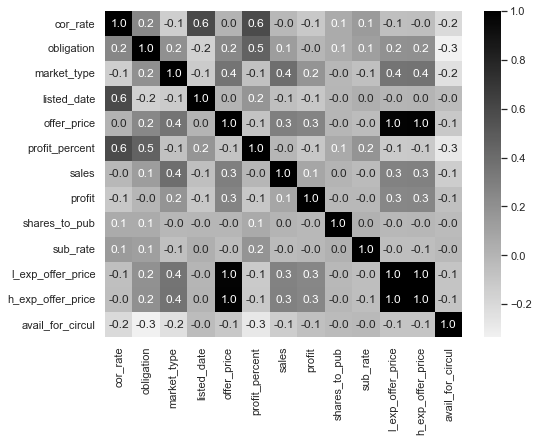

In [11]:
cmap = sns.light_palette("black", as_cmap=True)
sns.set(rc = {'figure.figsize':(8,6)})
sns.heatmap(x.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.110282,sub_rate
1,1.139504,profit
2,1.300587,sales
3,1.637256,market_type
4,2.074366,shares_to_pub
5,3.135665,obligation
6,4.108748,profit_percent
7,4.692507,cor_rate
8,9.447496,avail_for_circul
9,17.220775,listed_date
